## 🦠📊 **Análise dos Dados da COVID-19 - Vacinações e Mortes**

##### Neste notebook, faremos uma análise dos dados relacionados à COVID-19, com foco nas informações de vacinações e mortes. Vamos explorar os dados disponíveis e tirar insights importantes sobre o impacto das campanhas de vacinação na redução das mortes pela doença.

### 📚 Importando Bibliotecas
###### As bibliotecas Python importadas são necessárias para manipulação e visualização dos dados.

In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 🎲 Carregando os Dados
##### Os dados utilizados aqui são fornecidos por [fonte dos dados].

In [350]:
# Carregando os dados de vacinações
df_vacinacoes = pd.read_csv('/content/drive/MyDrive/Ada/1015/COVID_VACCINATIONS.csv')

In [351]:
# Carregando os dados de mortes
df_mortes = pd.read_csv('/content/drive/MyDrive/Ada/1015/COVID DEATHS.csv')

In [352]:
# Visualizando as colunas do dataset
df_vacinacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302749 non-null  object 
 1   continent                                   288347 non-null  object 
 2   location                                    302749 non-null  object 
 3   date                                        302749 non-null  object 
 4   total_tests                                 79387 non-null   float64
 5   new_tests                                   75403 non-null   float64
 6   total_tests_per_thousand                    79387 non-null   float64
 7   new_tests_per_thousand                      75403 non-null   float64
 8   new_tests_smoothed                          103965 non-null  float64
 9   new_tests_smoothed_per_thousand             103965 non-null  float64
 

In [353]:
# Visualizando as colunas do dataset
df_mortes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   iso_code                            302749 non-null  object 
 1   continent                           288347 non-null  object 
 2   location                            302749 non-null  object 
 3   date                                302749 non-null  object 
 4   population                          302749 non-null  int64  
 5   total_cases                         266771 non-null  float64
 6   new_cases                           294064 non-null  float64
 7   new_cases_smoothed                  292800 non-null  float64
 8   total_deaths                        246214 non-null  float64
 9   new_deaths                          294139 non-null  float64
 10  new_deaths_smoothed                 292909 non-null  float64
 11  total_cases_per_million   

### 🧹 Limpeza dos Dados
###### O objetivo dessa etapa é identificar e lidar com possíveis problemas nos dados, como valores ausentes, duplicatas ou informações inconsistentes

In [354]:
# Filtrando as linhas que não contém nomes de paises indesejados com base na coluna 'location'

nomes_indesejados = ['World', 'European Union', 'Upper middle income', 'High income','Low income', 'Lower middle income', 'South America', 'Africa', 'Asia', 'Oceania', 'North America', 'Europe']

df_vacinacoes_filtrado = df_vacinacoes[~df_vacinacoes['location'].isin(nomes_indesejados)]
df_mortes_filtrado = df_mortes[~df_mortes['location'].isin(nomes_indesejados)]

In [355]:
df_vacinacoes['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

### 📈 Análise Exploratória de Dados

###### 🔍 **Quais foram os 5 países com maior percentual de mortes em relação a sua população total?**


In [356]:
# Copia dataset inicial filtrado
df_mortes_limpo = df_mortes_filtrado.copy()

In [357]:
# Seleciona colunas que serão utilizadas
df_paises_populacao_e_mortes = df_mortes_limpo[['location', 'population', 'total_deaths']]

In [358]:
# Agrupa os dados por país e pega índices das linhas onde a coluna total_deaths é máxima por país
total_mortes_por_paises_idxs = df_paises_populacao_e_mortes.groupby('location')['total_deaths'].idxmax()

In [359]:
# Visualiza se existem países que não tem total_deaths
total_mortes_por_paises_idxs[total_mortes_por_paises_idxs.isnull()]

location
England            NaN
Falkland Islands   NaN
Hong Kong          NaN
Macao              NaN
Niue               NaN
North Korea        NaN
Northern Cyprus    NaN
Northern Ireland   NaN
Pitcairn           NaN
Saint Helena       NaN
Scotland           NaN
Taiwan             NaN
Tokelau            NaN
Turkmenistan       NaN
Tuvalu             NaN
Vatican            NaN
Wales              NaN
Western Sahara     NaN
Name: total_deaths, dtype: float64

In [360]:
# Retira países que não tem total_deaths
total_mortes_por_paises_idxs_filtrado = total_mortes_por_paises_idxs.dropna(axis=0, how='any')

In [361]:
# Seleciona linhas no dataset original onde cada país tem o máximo de mortes
df_total_mortes_por_pais = df_paises_populacao_e_mortes.loc[total_mortes_por_paises_idxs_filtrado]

In [362]:
# Cria nova coluna com % de mortes
df_total_mortes_por_pais['death_rate_%'] = (df_total_mortes_por_pais['total_deaths']/df_total_mortes_por_pais['population']) * 100

In [363]:
# Ordena por % de mortes
paises_ordenados_por_mortes = df_total_mortes_por_pais.sort_values(by=['death_rate_%'], ascending=False, ignore_index = True)

In [364]:
# Visualiza o top 5 resultante
paises_ordenados_por_mortes.head(5)

,location,population,total_deaths,death_rate_%
0,Peru,34049588,219866.0,0.645723
1,Bulgaria,6781955,38282.0,0.564469
2,Bosnia and Herzegovina,3233530,16328.0,0.504959
3,Hungary,9967304,48719.0,0.488788
4,North Macedonia,2093606,9667.0,0.461739


###### 🧐 **Conclusão Preliminar**

📊 Com base na análise preliminar dos dados, os países com maiores percentuais de mortes em relação a sua população são Peru, Bulgaria, Bosnia e Herzegovina, Hungária e Macedônia do Norte. O primeiro lugar fica com o peru com cerca de 0.65% de mortes e tendo uma população de pouco mais de 34 milhões.

###### 🔍 **Países com maior índice de rigidez nas restrições têm uma taxa de mortalidade menor?**

In [365]:
# Copia dataset inicial filtrado
df_vacinacoes_limpo = df_vacinacoes_filtrado.copy()

In [366]:
# Seleciona colunas que serão utilizadas
df_vacinacoes_limpo = df_vacinacoes_limpo[['location','stringency_index']]

In [367]:
# Agrupa por país e faz a média do índice de rigidez
df_vacinacoes_limpo = df_vacinacoes_limpo.groupby(['location']).mean().reset_index()

In [368]:
# Ordena por média do índice de rigidez
ordenado_por_media_restricao = df_vacinacoes_limpo.sort_values(by='stringency_index', ascending=False, ignore_index = True)

In [369]:
# Retira países que não tem índice de restrição
ordenado_por_media_restricao = ordenado_por_media_restricao.dropna(axis=0, how='any')

In [370]:
ordenado_por_media_restricao

,location,stringency_index
0,China,71.470028
1,Myanmar,64.979507
2,Honduras,64.075423
3,Azerbaijan,60.696651
4,Iran,60.495870
...,...,...
176,Niger,21.079330
177,Burkina Faso,20.895274
178,Burundi,16.159572
179,Tanzania,15.248326


In [371]:
# Copia dataset inicial filtrado
df_mortes_limpo = df_mortes_filtrado.copy()

In [372]:
# Seleciona colunas que serão utilizadas
df_paises_populacao_e_mortes = df_mortes_limpo[['location', 'population', 'total_deaths']]

In [373]:
# Agrupa os dados por país e pega índices das linhas onde a coluna total_deaths é máxima por país
total_mortes_por_paises_idxs = df_paises_populacao_e_mortes.groupby('location')['total_deaths'].idxmax()

In [374]:
# Visualiza se existem países que não tem total_deaths
total_mortes_por_paises_idxs[total_mortes_por_paises_idxs.isnull()]

location
England            NaN
Falkland Islands   NaN
Hong Kong          NaN
Macao              NaN
Niue               NaN
North Korea        NaN
Northern Cyprus    NaN
Northern Ireland   NaN
Pitcairn           NaN
Saint Helena       NaN
Scotland           NaN
Taiwan             NaN
Tokelau            NaN
Turkmenistan       NaN
Tuvalu             NaN
Vatican            NaN
Wales              NaN
Western Sahara     NaN
Name: total_deaths, dtype: float64

In [375]:
# Retira países que não tem total_deaths
total_mortes_por_paises_idxs_filtrado = total_mortes_por_paises_idxs.dropna(axis=0, how='any')

In [376]:
# Seleciona linhas no dataset original onde cada país tem o máximo de mortes
df_total_mortes_por_pais = df_paises_populacao_e_mortes.loc[total_mortes_por_paises_idxs_filtrado]

In [377]:
# Cria nova coluna com % de mortes
df_total_mortes_por_pais['death_rate_%'] = (df_total_mortes_por_pais['total_deaths']/df_total_mortes_por_pais['population']) * 100

In [378]:
# Ordena por % de mortes
paises_ordenados_por_death_rate = df_total_mortes_por_pais.sort_values(by=['death_rate_%'], ascending=False, ignore_index = True)

In [379]:
# Visualiza o dataset resultante
paises_ordenados_por_death_rate.head(10)

,location,population,total_deaths,death_rate_%
0,Peru,34049588,219866.0,0.645723
1,Bulgaria,6781955,38282.0,0.564469
2,Bosnia and Herzegovina,3233530,16328.0,0.504959
3,Hungary,9967304,48719.0,0.488788
4,North Macedonia,2093606,9667.0,0.461739
5,Georgia,3744385,17032.0,0.454868
6,Croatia,4030361,18091.0,0.448868
7,Montenegro,627082,2808.0,0.447788
8,Slovenia,2119843,9230.0,0.435410
9,Czechia,10493990,42702.0,0.406919


In [380]:
# Junta os dois datasets criados anteriormente
paises_restricao_deathrate = ordenado_por_media_restricao.set_index('location').join(paises_ordenados_por_death_rate.set_index('location')).reset_index()

In [381]:
# Retira linhas em que não há algum dos dados
paises_restricao_deathrate = paises_restricao_deathrate.dropna(axis=0, how='any')

In [382]:
# cria nova coluna com ranking dos países por índice de rigidez, com o primeiro sendo o que tem a taxa mais alta
paises_restricao_deathrate['stringency_rank'] = paises_restricao_deathrate['stringency_index'].rank(ascending=False)

In [383]:
# Cria nova coluna com ranking dos países por taxa de mortalidade, com o primeiro sendo o que tem a taxa mais alta
paises_restricao_deathrate['death_rate_%rank'] = paises_restricao_deathrate['death_rate_%'].rank(ascending=False)

In [384]:
# Visualiza o dataset resultante visualizando que os países top 5 com maiores índices de restrição não são necessariamente os com maior % de mortes
paises_restricao_deathrate.head()

,location,stringency_index,population,total_deaths,death_rate_%,stringency_rank,death_rate_%rank
0,China,71.470028,1.425887e+09,120905.0,0.008479,1.0,145.0
1,Myanmar,64.979507,5.417931e+07,19490.0,0.035973,2.0,114.0
2,Honduras,64.075423,1.043286e+07,11111.0,0.106500,3.0,79.0
3,Azerbaijan,60.696651,1.035808e+07,10197.0,0.098445,4.0,84.0
4,Iran,60.495870,8.855057e+07,145571.0,0.164393,5.0,59.0


In [385]:
# Cria a instância de correlação no dataframe
corr = paises_restricao_deathrate.corr(numeric_only=True)
corr

,stringency_index,population,total_deaths,death_rate_%,stringency_rank,death_rate_%rank
stringency_index,1.000000,0.288725,0.194838,0.085353,-0.962685,-0.201450
population,0.288725,1.000000,0.456561,-0.087400,-0.236807,0.088522
total_deaths,0.194838,0.456561,1.000000,0.294000,-0.201722,-0.287669
death_rate_%,0.085353,-0.087400,0.294000,1.000000,-0.036489,-0.919759
stringency_rank,-0.962685,-0.236807,-0.201722,-0.036489,1.000000,0.142039
death_rate_%rank,-0.201450,0.088522,-0.287669,-0.919759,0.142039,1.000000


<Axes: >

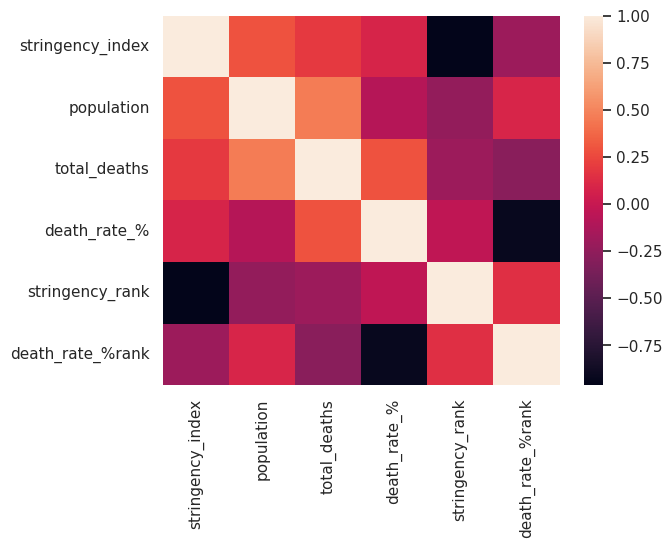

In [386]:
# Cria o mapa de calor em que percebemos que o índice de restrição não possui forte correlação negativa (inversamente proporcional) com o % de mortes
sns.heatmap(corr)

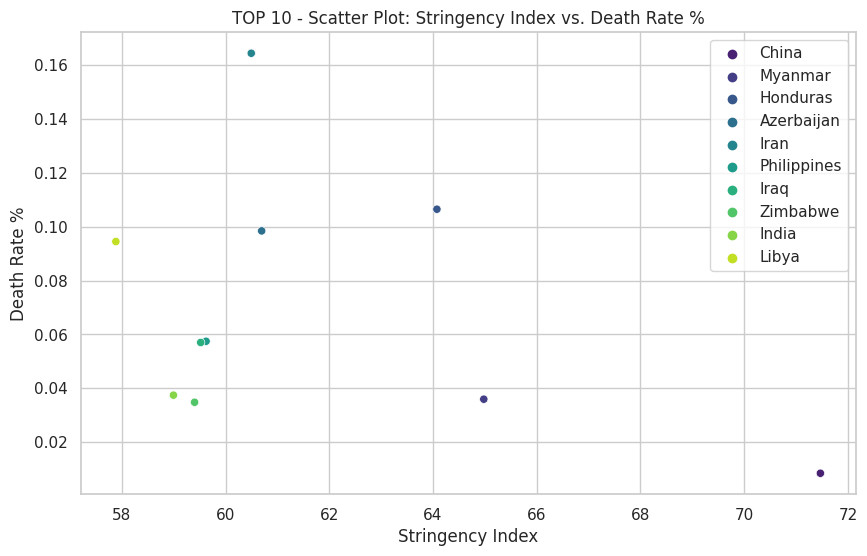

In [387]:
# Plota um gráfico de dispersão para entendermos melhor o comportamento do top 10 de paises em relação a índice de restrição e % de morte. É possível uma correlação quase nula.

top10 = paises_restricao_deathrate.head(10)

# Definir o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=top10, x="stringency_index", y="death_rate_%", hue="location", palette="viridis")

# Adicionar título e rótulos dos eixos
plt.title("TOP 10 - Scatter Plot: Stringency Index vs. Death Rate %")
plt.xlabel("Stringency Index")
plt.ylabel("Death Rate %")

# Mostrar a legenda
plt.legend()

# Mostrar o plot
plt.show()

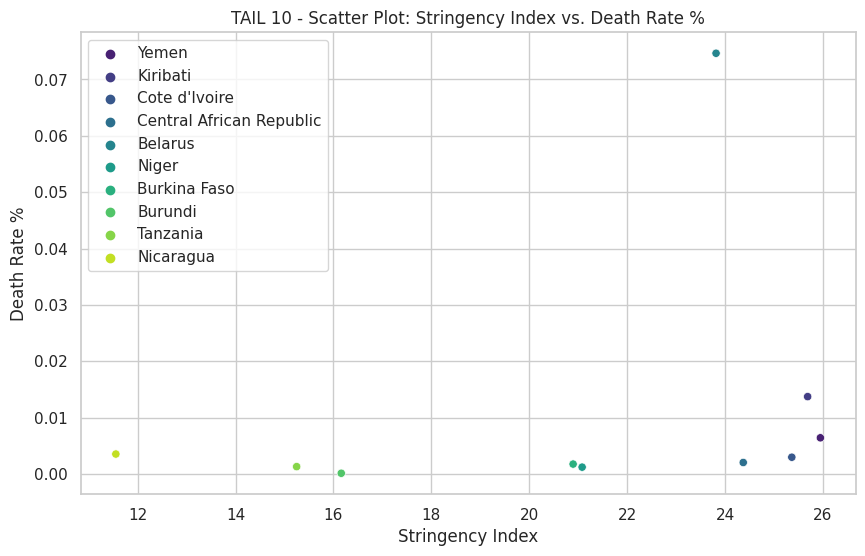

In [388]:
# Plota um gráfico de dispersão para entendermos melhor o comportamento do tail 10 de paises em relação a índice de restrição e % de morte. É possível uma correlação quase nula.

tail10 = paises_restricao_deathrate.tail(10)

# Definir o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=tail10, x="stringency_index", y="death_rate_%", hue="location", palette="viridis")

# Adicionar título e rótulos dos eixos
plt.title("TAIL 10 - Scatter Plot: Stringency Index vs. Death Rate %")
plt.xlabel("Stringency Index")
plt.ylabel("Death Rate %")

# Mostrar a legenda
plt.legend()

# Mostrar o plot
plt.show()

###### 🧐 **Conclusão Preliminar**

🥇 **Top 10** (Maior índice de rigidez nas restrições):

* As taxas de mortalidade variam, mas algumas têm valores baixos, enquanto outras têm valores mais altos.
* Não há uma relação direta e consistente entre um alto índice de rigidez nas restrições e uma taxa de mortalidade mais baixa. Por exemplo, apesar de a China ter um alto índice de rigidez, sua taxa de mortalidade não é a mais baixa entre os países do top10.

🥉 **Tail 10** (Menor índice de rigidez nas restrições):

* As taxas de mortalidade também variam nesse grupo, mas algumas têm valores muito baixos.
* Existem casos em que um baixo índice de rigidez não necessariamente resultou em uma taxa de mortalidade baixa (por exemplo, "Burundi").


📊 Com base na análise preliminar dos dados, não parece haver uma relação direta e linear entre um alto índice de rigidez nas restrições e uma taxa de mortalidade mais baixa. Outros fatores, como infraestrutura de saúde, capacidade de teste e disponibilidade de tratamento médico, podem estar influenciando as taxas de mortalidade.

###### 🔍 **Países com maior índice de rigidez nas medidas restritivas tendem a ter uma taxa de vacinação mais alta?**


In [389]:
# Copia dataset inicial filtrado
df_vacinacoes_limpo = df_vacinacoes_filtrado.copy()

In [390]:
# Seleciona colunas que serão utilizadas
df_vacinacoes_limpo = df_vacinacoes_limpo[['location','stringency_index']]

In [391]:
# Agrupa por país e faz a média do índice de rigidez
df_vacinacoes_limpo = df_vacinacoes_limpo.groupby(['location']).mean().reset_index()

In [392]:
# Ordena por média do índice de rigidez
ordenado_por_media_restricao = df_vacinacoes_limpo.sort_values(by='stringency_index', ascending=False, ignore_index = True)

In [393]:
# Retira países que não tem índice de restrição
ordenado_por_media_restricao = ordenado_por_media_restricao.dropna(axis=0, how='any')

In [394]:
# Copia dataset inicial filtrado
df_total_pessoas_vacinadas_limpo = df_vacinacoes_filtrado.copy()

In [395]:
# Seleciona colunas que serão utilizadas
df_total_pessoas_vacinadas_limpo = df_total_pessoas_vacinadas_limpo[['location','people_vaccinated']]

In [396]:
# Agrupa os dados por país e pega índices das linhas onde a coluna people_vaccinated é máxima por país
total_vacinados_por_paises_idxs = df_total_pessoas_vacinadas_limpo.groupby('location')['people_vaccinated'].idxmax()

In [397]:
# Visualiza se existem países que não tem people_vaccinated
total_vacinados_por_paises_idxs[total_vacinados_por_paises_idxs.isnull()]

location
American Samoa                 NaN
Eritrea                        NaN
French Guiana                  NaN
Guadeloupe                     NaN
Guam                           NaN
Marshall Islands               NaN
Martinique                     NaN
Mayotte                        NaN
Micronesia (country)           NaN
North Korea                    NaN
Northern Mariana Islands       NaN
Palau                          NaN
Puerto Rico                    NaN
Reunion                        NaN
Saint Barthelemy               NaN
Saint Martin (French part)     NaN
Saint Pierre and Miquelon      NaN
United States Virgin Islands   NaN
Vatican                        NaN
Western Sahara                 NaN
Name: people_vaccinated, dtype: float64

In [398]:
# Retira países que não tem people_vaccinated
total_vacinados_por_paises_idxs_filtrado = total_vacinados_por_paises_idxs.dropna(axis=0, how='any')

In [399]:
# Seleciona linhas no dataset original onde cada país tem o máximo de mortes
df_total_vacinados_por_pais = df_total_pessoas_vacinadas_limpo.loc[total_vacinados_por_paises_idxs_filtrado]

In [400]:
# Copia dataset inicial filtrado
df_mortes_limpo = df_mortes_filtrado.copy()

In [401]:
# Seleciona colunas que serão utilizadas
df_paises_populacao = df_mortes_limpo[['location', 'population']]

In [402]:
# Agrupa os dados por país e pega índices das linhas onde a coluna populacao é máxima por país
total_populacao_por_paises_idxs = df_paises_populacao_e_mortes.groupby('location')['population'].idxmax()

In [403]:
# Retira países que não tem populacao
total_populacao_por_paises_idxs_filtrado = total_populacao_por_paises_idxs.dropna(axis=0, how='any')

In [404]:
# Seleciona linhas no dataset original onde cada país tem o máximo de mortes
total_populacao_por_paises_idxs = df_paises_populacao.loc[total_populacao_por_paises_idxs_filtrado]

In [405]:
# Junta os dois datasets criados anteriormente
paises_restricao_vacinados = ordenado_por_media_restricao.set_index('location').join(df_total_vacinados_por_pais.set_index('location')).reset_index()

In [406]:
# Junta os dois datasets criados anteriormente
paises_restricao_vacinados_populacao = paises_restricao_vacinados.set_index('location').join(total_populacao_por_paises_idxs.set_index('location')).reset_index()

In [407]:
# Cria nova coluna com % de populacao vacinada
paises_restricao_vacinados_populacao['vaccinated_rate_%'] = (paises_restricao_vacinados_populacao['people_vaccinated']/paises_restricao_vacinados_populacao['population']) * 100

In [408]:
# Cria nova coluna com ranking dos países por indice de restrição, sendo o 1º país que tem maior indice de restrição
paises_restricao_vacinados_populacao['stringency_rank'] = paises_restricao_vacinados_populacao['stringency_index'].rank(ascending=False)

In [409]:
# Cria nova coluna com ranking dos países por pessoas vacinadas, sendo o 1º país que tem mais pessoas vacinadas
paises_restricao_vacinados_populacao['people_vaccinated_rank'] = paises_restricao_vacinados_populacao['vaccinated_rate_%'].rank(ascending=False)

In [410]:
# Visualiza o dataset resultante visualizando que os países top 5 com maiores índices de restrição não são necessariamente os com maior número de vacinados
paises_restricao_vacinados_populacao.head()

,location,stringency_index,people_vaccinated,population,vaccinated_rate_%,stringency_rank,people_vaccinated_rank
0,China,71.470028,1.310292e+09,1425887360,91.893093,1.0,10.0
1,Myanmar,64.979507,3.477731e+07,54179312,64.189287,2.0,95.0
2,Honduras,64.075423,6.550968e+06,10432858,62.791691,3.0,96.0
3,Azerbaijan,60.696651,5.373253e+06,10358078,51.875000,4.0,117.0
4,Iran,60.495870,6.515977e+07,88550568,73.584810,5.0,72.0


In [411]:
# Visualiza o dataset resultante visualizando que os países tail 5 com maiores índices de restrição não são necessariamente os com maior número de vacinados
paises_restricao_vacinados_populacao.tail()

,location,stringency_index,people_vaccinated,population,vaccinated_rate_%,stringency_rank,people_vaccinated_rank
176,Niger,21.079330,6217508.0,26207982,23.723719,177.0,166.0
177,Burkina Faso,20.895274,5152110.0,22673764,22.722782,178.0,168.0
178,Burundi,16.159572,34323.0,12889583,0.266285,179.0,181.0
179,Tanzania,15.248326,34434933.0,65497752,52.574221,180.0,116.0
180,Nicaragua,11.555302,6254204.0,6948395,90.009333,181.0,17.0


In [428]:
# Cria a instância de correlação no dataframe
corr = paises_restricao_vacinados_populacao.corr(numeric_only=True)
corr

,stringency_index,people_vaccinated,population,vaccinated_rate_%,stringency_rank,people_vaccinated_rank
stringency_index,1.000000,0.298862,0.284655,0.211361,-0.965047,-0.193882
people_vaccinated,0.298862,1.000000,0.988906,0.159577,-0.240660,-0.166387
population,0.284655,0.988906,1.000000,0.110038,-0.233431,-0.114287
vaccinated_rate_%,0.211361,0.159577,0.110038,1.000000,-0.199791,-0.980905
stringency_rank,-0.965047,-0.240660,-0.233431,-0.199791,1.000000,0.189742
people_vaccinated_rank,-0.193882,-0.166387,-0.114287,-0.980905,0.189742,1.000000


<Axes: >

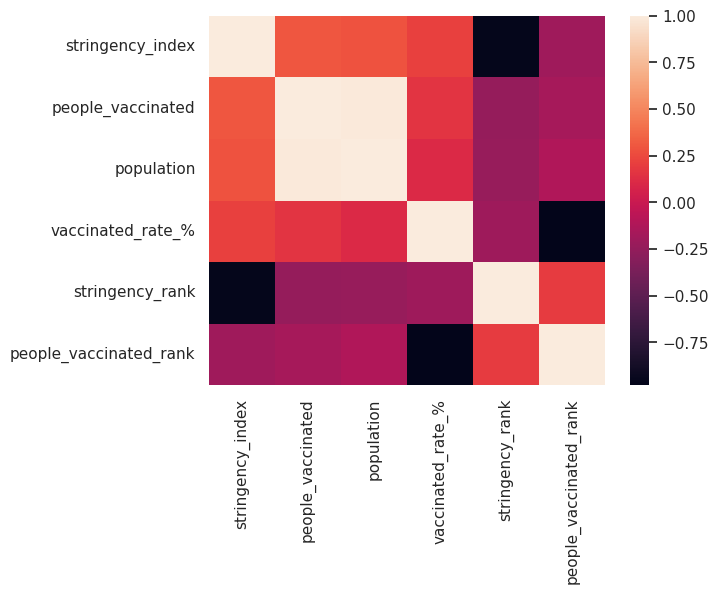

In [430]:
# Cria o mapa de calor em que percebemos que o índice de restrição possui uma certa correlação positiva com o número de pessoas vacinadas
sns.heatmap(corr)

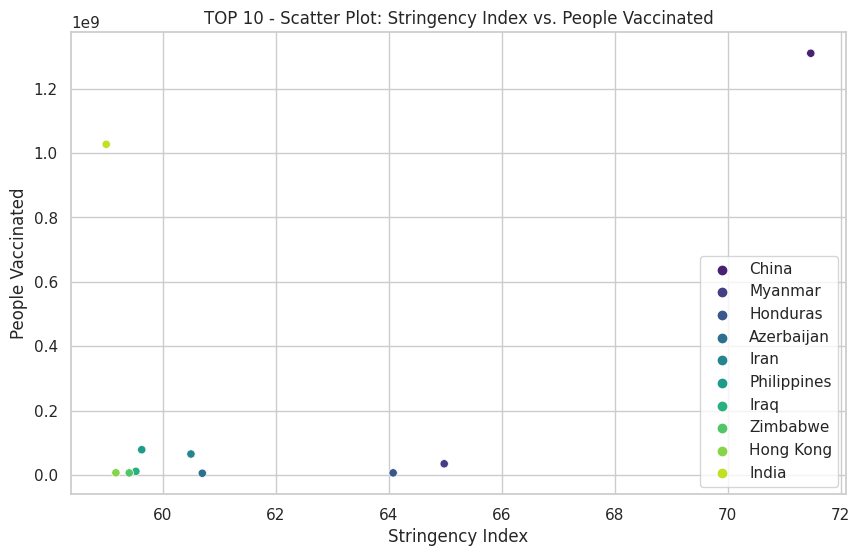

In [431]:
# Plota um gráfico de dispersão para entendermos melhor o comportamento do top 10 de paises em relação a índice de restrição e pessoas vacinadas. É possível uma correlação quase nula.

top10 = paises_restricao_vacinados.head(10)

# Definir o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=top10, x="stringency_index", y="people_vaccinated", hue="location", palette="viridis")

# Adicionar título e rótulos dos eixos
plt.title("TOP 10 - Scatter Plot: Stringency Index vs. People Vaccinated")
plt.xlabel("Stringency Index")
plt.ylabel("People Vaccinated")

# Mostrar a legenda
plt.legend()

# Mostrar o plot
plt.show()

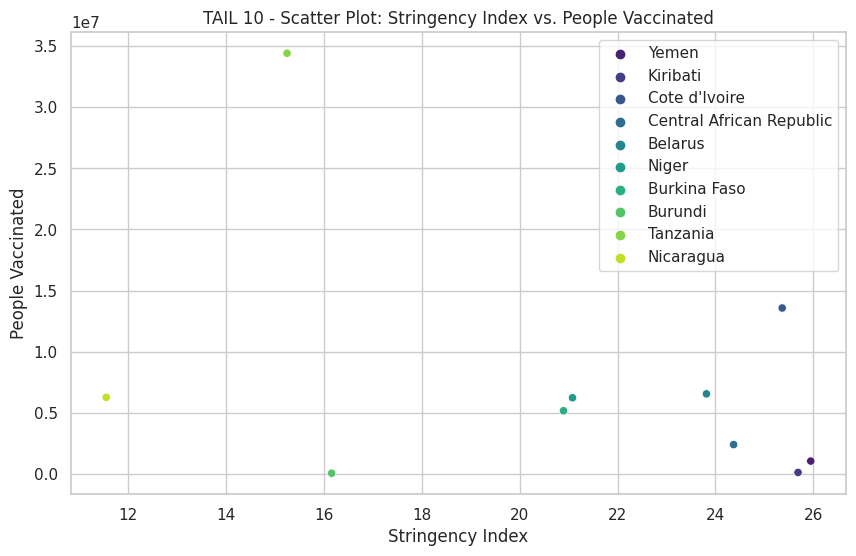

In [432]:
# Plota um gráfico de dispersão para entendermos melhor o comportamento do tail 10 de paises em relação a índice de restrição e pessoas vacinadas. É possível uma correlação quase nula.

tail10 = paises_restricao_vacinados.tail(10)

# Definir o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=tail10, x="stringency_index", y="people_vaccinated", hue="location", palette="viridis")

# Adicionar título e rótulos dos eixos
plt.title("TAIL 10 - Scatter Plot: Stringency Index vs. People Vaccinated")
plt.xlabel("Stringency Index")
plt.ylabel("People Vaccinated")

# Mostrar a legenda
plt.legend()

# Mostrar o plot
plt.show()

###### 🧐 **Conclusão Preliminar**

🥇 Top 10 (Maior índice de rigidez nas restrições):

* A quantidade de pessoas vacinadas variam bastante mas em geral tem valores altos.
* Não há uma relação direta e consistente entre um alto índice de rigidez nas restrições e uma alta quantidade de pessoas vacinadas. É possível perceber uma leve correlação mas não podemos inferir causalidade.

🥉 Tail 10 (Menor índice de rigidez nas restrições):

* A quantidade de pessoas vacinadas variam bastante também nesse grupo mas em geral todos estão mais próximos das últimas colocações em relação a ranking de vacinação
* Entre os países com menores índice de rigidez nas restrições parece haver mais correlação entre a quantidade de pessoas vacinadas visto que a maioria dos países do com menor restrição também possuem menos pessoas vacinadas em percentual

###### 🔍 **Os 10 países com maior população tiveram maiores números, em proporção, de mortes por Covid-19?**

In [433]:
# Copia dataset inicial filtrado
df_mortes_limpo = df_mortes_filtrado.copy()

In [434]:
# Seleciona colunas que serão utilizadas
df_paises_populacao_e_mortes = df_mortes_limpo[['location', 'population', 'total_deaths']]

In [435]:
# Agrupa os dados por país e pega índices das linhas onde a coluna total_deaths é máxima por país
total_mortes_por_paises_idxs = df_paises_populacao_e_mortes.groupby('location')['total_deaths'].idxmax()

In [436]:
# Visualiza se existem países que não tem total_deaths
total_mortes_por_paises_idxs[total_mortes_por_paises_idxs.isnull()]

location
England            NaN
Falkland Islands   NaN
Hong Kong          NaN
Macao              NaN
Niue               NaN
North Korea        NaN
Northern Cyprus    NaN
Northern Ireland   NaN
Pitcairn           NaN
Saint Helena       NaN
Scotland           NaN
Taiwan             NaN
Tokelau            NaN
Turkmenistan       NaN
Tuvalu             NaN
Vatican            NaN
Wales              NaN
Western Sahara     NaN
Name: total_deaths, dtype: float64

In [437]:
# Retira países que não tem total_deaths
total_mortes_por_paises_idxs_filtrado = total_mortes_por_paises_idxs.dropna(axis=0, how='any')

In [438]:
# Seleciona linhas no dataset original onde cada país tem o máximo de mortes
df_total_mortes_por_pais = df_paises_populacao_e_mortes.loc[total_mortes_por_paises_idxs_filtrado]

In [439]:
# Cria nova coluna com % de mortes
df_total_mortes_por_pais['death_rate_%'] = (df_total_mortes_por_pais['total_deaths']/df_total_mortes_por_pais['population']) * 100

In [440]:
# Ordena por populacao
paises_ordenados_por_populacao = df_total_mortes_por_pais.sort_values(by=['population'], ascending=False, ignore_index = True)

In [441]:
# Visualiza o dataset resultante
paises_ordenados_por_populacao.head(10)

,location,population,total_deaths,death_rate_%
0,China,1425887360,120905.0,0.008479
1,India,1417173120,531000.0,0.037469
2,United States,338289856,1118800.0,0.330722
3,Indonesia,275501344,161071.0,0.058465
4,Pakistan,235824864,30652.0,0.012998
5,Nigeria,218541216,3155.0,0.001444
6,Brazil,215313504,700556.0,0.325366
7,Bangladesh,171186368,29446.0,0.017201
8,Russia,144713312,397642.0,0.274779
9,Mexico,127504120,333596.0,0.261635


In [442]:
# Cria nova coluna com ranking dos países por taxa de mortalidade, com o primeiro sendo o que tem a taxa mais alta
paises_ordenados_por_populacao['death_rate_%rank'] = paises_ordenados_por_populacao['death_rate_%'].rank(ascending=False)

In [443]:
# Selecionando o top10 países por população é possível perceber que eles não se encontram no máximo em 19º posição quando se trata de ranking de morte
paises_ordenados_por_populacao.head(10)

,location,population,total_deaths,death_rate_%,death_rate_%rank
0,China,1425887360,120905.0,0.008479,189.0
1,India,1417173120,531000.0,0.037469,150.0
2,United States,338289856,1118800.0,0.330722,19.0
3,Indonesia,275501344,161071.0,0.058465,133.0
4,Pakistan,235824864,30652.0,0.012998,178.0
5,Nigeria,218541216,3155.0,0.001444,218.0
6,Brazil,215313504,700556.0,0.325366,21.0
7,Bangladesh,171186368,29446.0,0.017201,170.0
8,Russia,144713312,397642.0,0.274779,33.0
9,Mexico,127504120,333596.0,0.261635,36.0


In [444]:
# Visualizando país que possui maior % de mortes proporcional
paises_ordenados_por_populacao.loc[paises_ordenados_por_populacao['death_rate_%rank']==1.0]

,location,population,total_deaths,death_rate_%,death_rate_%rank
43,Peru,34049588,219866.0,0.645723,1.0


###### 🧐 **Conclusão Preliminar**

📊 Com base na análise preliminar dos dados, podemos afirmar que os 10 países com maiores populações estão necessariamente com os maiores percentuais de morte proporcional. Dos países citados, os que possuem maior % de mortes são Estados Unidos, Brasil, Rússia e México. O restante não se encontra nem entre os 100 países com maior % proporcional de mortes.